## Lab 3: Molecular Motion and Probabilities
<bk>
Shreya Parjan
<bk>
9/24/18

Short introduction to what the lab is about. You may want to write this introduction after all the analysis is finished and you have a better sense as to what the lab is about.

### Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import scipy.optimize
import math as m
%matplotlib inline
import glob

### Data

In [3]:
separation = .50 #m
binWidth = 0.02 #m
print(glob.glob('Squiggle_Balls*.txt'))
filenames = glob.glob('Squiggle_Balls*.txt')

['Squiggle_Balls_5_5_Mon.txt', 'Squiggle_Balls_2_3_Mon.txt', 'Squiggle_Balls_2_2_Mon.txt']


### Graphs & Analysis

Squiggle_Balls_5_5_Mon.txt


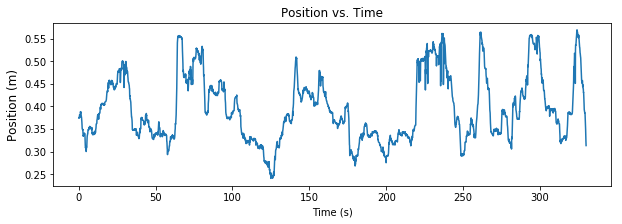

mu =  0.3951870938181818
sigma =  0.07342375687683339
mu - sigma =  0.3217633369413484
mu + sigma =  0.4686108506950152
relative fluctuation =  0.18579492606257605
max position =  0.5690624
min position =  0.24060559999999998
[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82
 0.84 0.86 0.88 0.9  0.92 0.94 0.96]


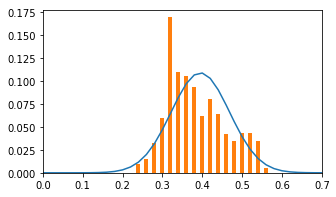

Squiggle_Balls_2_3_Mon.txt


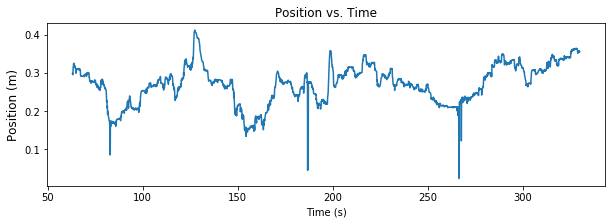

mu =  0.2707013523025084
sigma =  0.05080449669634453
mu - sigma =  0.2198968556061639
mu + sigma =  0.32150584899885293
relative fluctuation =  0.18767729183550796
max position =  0.4126544
min position =  0.023006399999999982
[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82
 0.84 0.86 0.88 0.9  0.92 0.94 0.96]


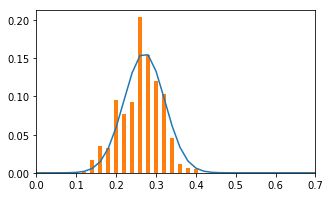

Squiggle_Balls_2_2_Mon.txt


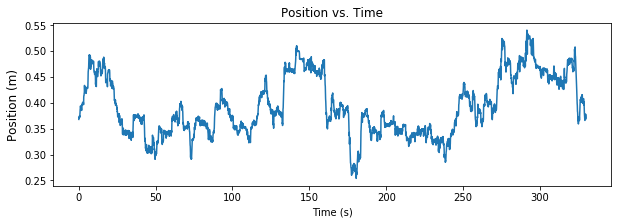

mu =  0.3928587254787234
sigma =  0.05678445571806754
mu - sigma =  0.33607426976065585
mu + sigma =  0.449643181196791
relative fluctuation =  0.1445416686338634
max position =  0.540199265
min position =  0.25400006500000005
[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82
 0.84 0.86 0.88 0.9  0.92 0.94 0.96]


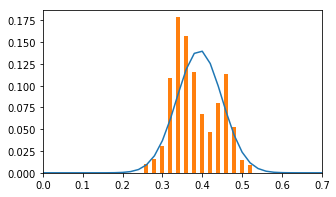

In [10]:
for f in filenames:
    print (f)
    
    data = np.loadtxt(fname=f)
    
    fig = plt.figure(figsize=(10.0,3.0))


    time = data[:,0] #time in seconds is all rows in column 0 
    position = data[:,1] - separation
    
    plt.plot(time,position)
    plt.xlabel('Time (s)') # label the x-axis
    plt.ylabel('Position (m)', size=12) # label the y-axis
    plt.title('Position vs. Time') # title
    plt.show()
    
    bins = np.arange(0,1,0.02)
    histo, pos_bins = np.histogram(position,bins)
    histo_norm = histo/histo.sum()
    fig = plt.figure(figsize=(5.0,3.0))
    
    pos_bins = pos_bins[:-1] #removes last element in array
    plt.bar(pos_bins,histo_norm,width = binWidth/2)
    
    plt.bar(pos_bins,histo_norm,width = binWidth/2)
    plt.xlim(0,.7)
    plt.ylim()

    bins = np.arange(0,1,0.02)
    histo, pos_bins = np.histogram(position,bins)
    histo_norm = histo/histo.sum()
   
    pos_bins = pos_bins[:-1] #removes last element in array
    
    mu = np.mean(position)
    print("mu = ",mu)
    sigma = np.std(position)
    print("sigma = ", sigma)
    print("mu - sigma = ", mu-sigma)
    print("mu + sigma = ", mu+sigma)
    
    relativeFluctuation = (sigma/mu)
    print("relative fluctuation = ",relativeFluctuation)
    print("max position = ",position.max())
    print("min position = ",position.min())
    #print(pos_bins)
    
    def Gaussian(x):
        "Gaussian is the gaussian (normal) distribution"
        exponent = (-(x-mu)**2)/(2*(sigma)**2)
        coefficient = 1/(sigma*np.sqrt(2*np.pi))
        gaussianFormula = coefficient*np.exp(exponent)
        return(gaussianFormula*binWidth)
    
    plt.plot(pos_bins,Gaussian(pos_bins))
    plt.show()

### Questions

1. Yes, because the average position (mu) for the datasets with equal balls on each side is the same (mu is about 0.40 m), which is a little over half the length of the tubing on the long side (.68 m). If the length of the tubing on the long side is 0.68 m, the expected value for the average position in the trials with an even number of balls on either side is 0.68/2 = 0.34 m, which is about .06 m off of our actual mu. The data with an uneven distribution of balls has an average position of  mu = 0.27 meters. The expected value for the average position in the trials with 3 balls on one side and 2 on the other is 0.68*(2/5) = 0.272 m, which is only 0.002 m off of our actual mu.
2. For 5 v 5, rf = 18.6%. For 2 v 3, rf = 18.8%. For 2 v 2, rf = 14%. We think the set with more balls overall should have the lowerst rf because there is less space for movement between the balls. This opposes our data, as the set with the least number of overall balls has the lowest rf. This might be the case because we only collected data for 5 minutes.
3. We identified the 2 v 3 gaussian to be the best because the area under the curve contains most of the data and the peak of the histogram matches that of the gaussian. (mu - sigma) = .22 while (mu + sigma) = .32, so we looked at the histogram and estimated what percent of the data was in each bar from .2 to .3: .09+.06+.08+.2+.15+.12+.1+.04+.02+.01+.01 = .76. The percentage of the data points that lie between one standard deviation of mu is 76%. This is 8% higher than the theoretical value.